In [24]:
import os
import pandas as pd

# Path to the folder with the CSV files
csv_folder = '../tubitakaiagentprojeleriiinverisetleri/'

import pandas as pd

# Load the datasets
try:
    purchase_df = pd.read_csv(csv_folder+'Purchase.csv')
    before_purchase_df = pd.read_csv(csv_folder+'BeforePurchaseDetailsScreen.csv')
    dog_added_df = pd.read_csv(csv_folder+'DogAdded.csv')
    cat_added_df = pd.read_csv(csv_folder+'CatAdded.csv')
    checkout_opened_df = pd.read_csv(csv_folder+'CheckoutPageOpened.csv')
    address_added_df = pd.read_csv(csv_folder+'AddressAdded.csv')
    sign_up_df_cleaned = pd.read_csv(csv_folder+'SignUpCompleted.csv')
    creditcard_added_df = pd.read_csv(csv_folder+'CreditcardAdded.csv')

    # Inspect each dataframe
    print("Purchase.csv info and head:")
    purchase_df.info()
    purchase_df.head()

    print("\nBeforePurchaseDetailsScreen.csv info and head:")
    before_purchase_df.info()
    before_purchase_df.head()

    print("\nDogAdded.csv info and head:")
    dog_added_df.info()
    dog_added_df.head()

    print("\nCatAdded.csv info and head:")
    cat_added_df.info()
    cat_added_df.head()

    print("\nCheckoutPageOpened.csv info and head:")
    checkout_opened_df.info()
    checkout_opened_df.head()
    
    print("\nAddressAdded.csv info and head:")
    address_added_df.info()
    address_added_df.head()
    
    print("\nSignUpCompleted.csv info and head:")
    sign_up_df_cleaned.info()
    sign_up_df_cleaned.head()
    
    print("\nCreditcardAdded.csv info and head:")
    creditcard_added_df.info()
    creditcard_added_df.head()

except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure all files are uploaded.")
except Exception as e:
    print(f"An error occurred: {e}")

Purchase.csv info and head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28770 entries, 0 to 28769
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   serviceid         28770 non-null  object
 1   ownerid           28768 non-null  object
 2   ordercreatedtime  28770 non-null  object
 3   servicetype       28770 non-null  object
dtypes: object(4)
memory usage: 899.2+ KB

BeforePurchaseDetailsScreen.csv info and head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36911 entries, 0 to 36910
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uuid           15209 non-null  object
 1   user_id        15209 non-null  object
 2   event_time     15209 non-null  object
 3   serviceType    15209 non-null  object
 4   uuid.1         21702 non-null  object
 5   user_id.1      21702 non-null  object
 6   event_time.1   21702 non-null  object
 7 

In [25]:
# --- Data Cleaning and Preparation ---

#  Clean BeforePurchaseDetailsScreen.csv
# The file has a strange structure with duplicated columns. We need to merge them.
before_purchase_part1 = before_purchase_df[['uuid', 'user_id', 'event_time', 'serviceType']].dropna()
before_purchase_part2 = before_purchase_df[['uuid.1', 'user_id.1', 'event_time.1', 'serviceType.1']].dropna()
before_purchase_part2.columns = ['uuid', 'user_id', 'event_time', 'serviceType']
before_purchase_df_cleaned = pd.concat([before_purchase_part1, before_purchase_part2], ignore_index=True)
before_purchase_df_cleaned.rename(columns={'user_id': 'ownerid'}, inplace=True)

# Corrigir datas para formato misto
for col in ['event_time']:
    before_purchase_df_cleaned[col] = pd.to_datetime(before_purchase_df_cleaned[col], format='mixed', errors='coerce')

#  Clean CheckoutPageOpened.csv
checkout_opened_df.rename(columns={'user_id': 'ownerid'}, inplace=True)

if 'event_time' in checkout_opened_df.columns:
    checkout_opened_df['event_time'] = pd.to_datetime(checkout_opened_df['event_time'], format='mixed', errors='coerce')

#  Clean Purchase.csv
purchase_df.dropna(subset=['ownerid'], inplace=True)
purchase_df.rename(columns={'servicetype': 'serviceType'}, inplace=True)

if 'event_time' in purchase_df.columns:
    purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], format='mixed', errors='coerce')

#  Clean and merge DogAdded.csv and CatAdded.csv
dog_added_df['pet_type'] = 'dog'
dog_added_df.rename(columns={'dogid': 'petid'}, inplace=True)

if 'event_time' in dog_added_df.columns:
    dog_added_df['event_time'] = pd.to_datetime(dog_added_df['event_time'], format='mixed', errors='coerce')

cat_added_df['pet_type'] = 'cat'
cat_added_df.rename(columns={'catid': 'petid'}, inplace=True)

if 'event_time' in cat_added_df.columns:
    cat_added_df['event_time'] = pd.to_datetime(cat_added_df['event_time'], format='mixed', errors='coerce')

pets_df = pd.concat([dog_added_df, cat_added_df], ignore_index=True)

# Owners
owners_df = sign_up_df_cleaned.dropna(subset=['id']).copy()
owners_df.rename(columns={'id': 'ownerid'}, inplace=True)
owners_df['signuptime'] = pd.to_datetime(owners_df['signuptime'])


#  Clean AddressAdded.csv
addresses_df = address_added_df.dropna(subset=['ownerid', 'addressid'])

if 'event_time' in addresses_df.columns:
    addresses_df['event_time'] = pd.to_datetime(addresses_df['event_time'], format='mixed', errors='coerce')

#  Clean SignUpCompleted.csv
sign_up_df_cleaned = sign_up_df_cleaned.dropna(subset=['id'])
sign_up_df_cleaned.rename(columns={'id': 'ownerid'}, inplace=True)

if 'event_time' in sign_up_df_cleaned.columns:
    sign_up_df_cleaned['event_time'] = pd.to_datetime(sign_up_df_cleaned['event_time'], format='mixed', errors='coerce')

#  Clean CreditcardAdded.csv
creditcard_added_df_cleaned = creditcard_added_df.dropna(subset=['ownerid', 'creditcardid'])

if 'event_time' in creditcard_added_df_cleaned.columns:
    creditcard_added_df_cleaned['event_time'] = pd.to_datetime(creditcard_added_df_cleaned['event_time'], format='mixed', errors='coerce')

# --- Merging DataFrames ---

# Merge checkout and purchase data to create a conversion funnel
# We are considering a conversion if a user who opened the checkout page for a service type made a purchase for the same service type.
# Aggregate checkout and purchase data
checkout_agg = checkout_opened_df.groupby(['ownerid', 'serviceType']).size().reset_index(name='checkout_count')
purchase_agg = purchase_df.groupby(['ownerid', 'serviceType']).size().reset_index(name='purchase_count')

# Merge for conversion analysis
conversion_df = pd.merge(checkout_agg, purchase_agg, on=['ownerid', 'serviceType'], how='left')
conversion_df['purchase_count'].fillna(0, inplace=True)
conversion_df['converted'] = conversion_df['purchase_count'] > 0


C:\Users\caioa\AppData\Local\Temp\ipykernel_3520\3311439544.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  conversion_df['purchase_count'].fillna(0, inplace=True)


In [26]:
# --- Analysis and Visualization ---

# 1. Overall Conversion Rate
total_checkouts = len(checkout_agg)
total_conversions = len(conversion_df[conversion_df['converted']])
overall_conversion_rate = (total_conversions / total_checkouts) * 100

print(f"Overall Conversion Rate: {overall_conversion_rate:.2f}%")


Overall Conversion Rate: 43.92%


In [27]:
conversions = (conversion_df[conversion_df['converted']])
conversions.head()
print(len(conversions['ownerid'].unique()))

1596


In [28]:
print("\n" + "="*80)
print("ANALYSIS 1: CUSTOMER CONVERSION FUNNEL")
print("="*80)
print("This funnel shows where users drop off between signing up and making a purchase.")

# Get unique owner IDs at each step
signed_up_users = set(owners_df['ownerid'])
added_pet_users = set(pets_df['ownerid'])
added_address_users = set(addresses_df['ownerid'])
added_card_users = set(creditcard_added_df['ownerid'])
opened_checkout_users = set(checkout_opened_df['ownerid'])
purchased_users = set(purchase_df['ownerid'])

# Build the funnel data
funnel_data = {
'Step': ["1. Signed Up", "2. Added a Pet", "3. Added Address", "4. Added Credit Card", "5. Opened Checkout", "6. Made Purchase"],
'User Count': [
    len(signed_up_users),
    len(added_pet_users),
    len(added_address_users),
    len(added_card_users),
    len(opened_checkout_users),
    len(purchased_users)
]
}
funnel_df = pd.DataFrame(funnel_data)
funnel_df['Overall Conversion from Signup'] = (funnel_df['User Count'] / funnel_df['User Count'].iloc[0] * 100).map('{:.2f}%'.format)

print(funnel_df.to_string(index=False))





ANALYSIS 1: CUSTOMER CONVERSION FUNNEL
This funnel shows where users drop off between signing up and making a purchase.
                Step  User Count Overall Conversion from Signup
        1. Signed Up       10986                        100.00%
      2. Added a Pet        1888                         17.19%
    3. Added Address        1771                         16.12%
4. Added Credit Card         643                          5.85%
  5. Opened Checkout        3213                         29.25%
    6. Made Purchase        1645                         14.97%


In [29]:
print("\n" + "="*80)
print("ANALYSIS 2: TOP PERFORMING SEGMENTS")
print("="*80)
print("This analysis identifies the most valuable services, pet types, and locations.")

# Merge purchases with pet and address data to get richer context
purchases_with_details = pd.merge(purchase_df, pets_df[['ownerid', 'pet_type']].drop_duplicates(), on='ownerid', how='left')
purchases_with_details = pd.merge(purchases_with_details, addresses_df[['ownerid', 'province']].drop_duplicates(), on='ownerid', how='left')

# Top 5 most purchased services
top_services = purchases_with_details['serviceType'].value_counts().nlargest(5)
print("\n--- Top 5 Most Purchased Services ---")
print(top_services.to_string())
print("\nINSIGHT: 'Customize', 'AdHoc' and 'Planned' are the most popular services.")
print("ACTION: Focus marketing campaigns and promotions on these high-demand services.")

# Sales by Pet Type
sales_by_pet_type = purchases_with_details.groupby('pet_type')['serviceid'].count().sort_values(ascending=False)
print("\n--- Total Purchases by Pet Type ---")
print(sales_by_pet_type.to_string())
print("\nINSIGHT: Dog owners make significantly more purchases than cat owners.")
print("ACTION: Create marketing campaigns specifically targeting cat owners to boost their engagement.")
print("         For dog owners, consider loyalty programs to retain these high-value customers.")

# Top 5 provinces by sales
sales_by_province = purchases_with_details['province'].value_counts().nlargest(5)
print("\n--- Top 5 Provinces by Number of Purchases ---")
print(sales_by_province.to_string())
print("\nINSIGHT: Sales are heavily concentrated in İstanbul.")
print("ACTION: Double down on marketing efforts in İstanbul. For other cities like İzmir and Ankara,")
print("         consider targeted local campaigns to increase market share.")



ANALYSIS 2: TOP PERFORMING SEGMENTS
This analysis identifies the most valuable services, pet types, and locations.

--- Top 5 Most Purchased Services ---
serviceType
Customize      15843
AdHoc           7346
Planned         4812
WalkAndCare      999
Boarding         219

INSIGHT: 'Customize', 'AdHoc' and 'Planned' are the most popular services.
ACTION: Focus marketing campaigns and promotions on these high-demand services.

--- Total Purchases by Pet Type ---
pet_type
dog    3302
cat     156

INSIGHT: Dog owners make significantly more purchases than cat owners.
ACTION: Create marketing campaigns specifically targeting cat owners to boost their engagement.
         For dog owners, consider loyalty programs to retain these high-value customers.

--- Top 5 Provinces by Number of Purchases ---
province
İstanbul    4785
İzmir        946
Ankara       146
Mersin        16
Muğla          6

INSIGHT: Sales are heavily concentrated in İstanbul.
ACTION: Double down on marketing efforts in İstan

In [30]:
print("\n" + "="*80)
print("ANALYSIS 3: TIME FROM SIGNUP TO FIRST PURCHASE")
print("="*80)
print("This analysis shows how long it takes for a new user to become a paying customer.")

# Merge owner signup time with their purchases
time_analysis_df = pd.merge(owners_df, purchase_df, on='ownerid')

# Garantir que ambas as colunas são datetime
time_analysis_df['ordercreatedtime'] = pd.to_datetime(time_analysis_df['ordercreatedtime'], errors='coerce')
time_analysis_df['signuptime'] = pd.to_datetime(time_analysis_df['signuptime'], errors='coerce')

# Remover linhas com NaN em 'ordercreatedtime' ou 'ownerid'
time_analysis_df = time_analysis_df.dropna(subset=['ordercreatedtime', 'ownerid'])

# Find the first purchase time for each user
first_purchase_df = time_analysis_df.loc[time_analysis_df.groupby('ownerid')['ordercreatedtime'].idxmin()]

# Calculate time to purchase
first_purchase_df['time_to_purchase'] = first_purchase_df['ordercreatedtime'] - first_purchase_df['signuptime']

# Remove negative deltas which can result from data errors
first_purchase_df = first_purchase_df[first_purchase_df['time_to_purchase'] >= pd.Timedelta(0)]

avg_time_to_purchase = first_purchase_df['time_to_purchase'].mean()
median_time_to_purchase = first_purchase_df['time_to_purchase'].median()

print(f"\nAverage time from signup to first purchase: {avg_time_to_purchase.days} days")
print(f"Median time from signup to first purchase:  {median_time_to_purchase.days} days")
print("\nINSIGHT: The median time to purchase is a key metric. Half of all new customers convert within this timeframe.")
print("ACTION: Consider setting up an automated marketing campaign (e.g., a special offer email)")
print(f"         for users who haven't made a purchase after {median_time_to_purchase.days + 1} days to re-engage them.")




ANALYSIS 3: TIME FROM SIGNUP TO FIRST PURCHASE
This analysis shows how long it takes for a new user to become a paying customer.

Average time from signup to first purchase: 2 days
Median time from signup to first purchase:  0 days

INSIGHT: The median time to purchase is a key metric. Half of all new customers convert within this timeframe.
ACTION: Consider setting up an automated marketing campaign (e.g., a special offer email)
         for users who haven't made a purchase after 1 days to re-engage them.


In [31]:
min_owners_per_breed = 10  # Minimum number of owners per breed to consider it significant

purchasing_users = set(purchase_df['ownerid'].dropna().unique())

print("\n" + "="*80)
print(f"ANALYSIS: TOP CONVERTING DOG BREEDS (min. {min_owners_per_breed} owners)")
print("="*80)

# Clean and prepare dog breed data
dog_breeds_df = dog_added_df[['ownerid', 'breed']].dropna().copy()
dog_breeds_df['breed'] = dog_breeds_df['breed'].str.strip().str.lower()
dog_owner_breeds = dog_breeds_df.drop_duplicates()

# Flag owners who have converted (made a purchase)
dog_owner_breeds['converted'] = dog_owner_breeds['ownerid'].isin(purchasing_users)

# Calculate conversion stats for each breed
dog_breed_stats = dog_owner_breeds.groupby('breed')['converted'].agg(
    total_owners='size',
    converted_owners='sum'
).reset_index()

# Filter for breeds that meet the minimum owner threshold
significant_dog_breeds = dog_breed_stats[dog_breed_stats['total_owners'] >= min_owners_per_breed].copy()

# Calculate conversion rate and sort
significant_dog_breeds['conversion_rate'] = (significant_dog_breeds['converted_owners'] / significant_dog_breeds['total_owners']) * 100
top_dog_breeds = significant_dog_breeds.sort_values(by='conversion_rate', ascending=False)
top_dog_breeds['conversion_rate'] = top_dog_breeds['conversion_rate'].map('{:.2f}%'.format)

# Display the results
if top_dog_breeds.empty:
    print(f"\nNo dog breeds met the minimum owner threshold of {min_owners_per_breed}.")
else:
    print(top_dog_breeds.to_string(index=False))



ANALYSIS: TOP CONVERTING DOG BREEDS (min. 10 owners)
                         breed  total_owners  converted_owners conversion_rate
                english setter            17                 6          35.29%
 cavalier king charles spaniel            12                 4          33.33%
                     chow chow            19                 6          31.58%
            labrador retriever            64                18          28.12%
                cocker spaniel            15                 4          26.67%
                        beagle            16                 4          25.00%
                french bulldog            57                14          24.56%
             doberman pinscher            21                 5          23.81%
                       mix irk           153                36          23.53%
                siberian husky            15                 3          20.00%
          jack russell terrier            41                 8          19.51

C:\Users\caioa\AppData\Local\Temp\ipykernel_3520\2148076246.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_owner_breeds['converted'] = dog_owner_breeds['ownerid'].isin(purchasing_users)


In [32]:
print("\n" + "="*80)
print(f"ANALYSIS: TOP CONVERTING CAT BREEDS (min. {min_owners_per_breed} owners)")
print("="*80)

# Clean and prepare cat breed data
cat_breeds_df = cat_added_df[['ownerid', 'breed']].dropna().copy()
cat_breeds_df['breed'] = cat_breeds_df['breed'].str.strip().str.lower()
cat_owner_breeds = cat_breeds_df.drop_duplicates()

# Flag owners who have converted
cat_owner_breeds['converted'] = cat_owner_breeds['ownerid'].isin(purchasing_users)

# Calculate conversion stats for each breed
cat_breed_stats = cat_owner_breeds.groupby('breed')['converted'].agg(
    total_owners='size',
    converted_owners='sum'
).reset_index()

# Filter for breeds that meet the minimum owner threshold
significant_cat_breeds = cat_breed_stats[cat_breed_stats['total_owners'] >= min_owners_per_breed].copy()

# Calculate conversion rate and sort
significant_cat_breeds['conversion_rate'] = (significant_cat_breeds['converted_owners'] / significant_cat_breeds['total_owners']) * 100
top_cat_breeds = significant_cat_breeds.sort_values(by='conversion_rate', ascending=False)
top_cat_breeds['conversion_rate'] = top_cat_breeds['conversion_rate'].map('{:.2f}%'.format)

# Display the results
if top_cat_breeds.empty:
    print(f"\nNo cat breeds met the minimum owner threshold of {min_owners_per_breed}.")
else:
    print(top_cat_breeds.to_string(index=False))

# --- 4. Final Insights ---
print("\n\n" + "="*80)
print("INSIGHT: By separating dogs and cats, you can identify the highest-value breeds within each category.")
print("ACTION: Tailor your marketing strategies. For example, run a Facebook ad campaign targeting 'Golden Retriever' owners")
print("         with ads for 'Boarding' services, and another campaign for 'British Shorthair' owners focusing on 'Grooming'.")
print("="*80)


ANALYSIS: TOP CONVERTING CAT BREEDS (min. 10 owners)
                   breed  total_owners  converted_owners conversion_rate
            sokak dedisi            12                 4          33.33%
           scottish fold            34                 6          17.65%
        uzun tüylü tekir            18                 3          16.67%
üç renkli tekir (calico)            26                 4          15.38%
            sokak kedisi            13                 2          15.38%
                   tekir           103                13          12.62%
                  sarman            32                 4          12.50%
                  smokin            18                 2          11.11%
       british shorthair            76                 6           7.89%
                  bombay            17                 1           5.88%
        british longhair            21                 1           4.76%


INSIGHT: By separating dogs and cats, you can identify the highest-v

C:\Users\caioa\AppData\Local\Temp\ipykernel_3520\858673676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_owner_breeds['converted'] = cat_owner_breeds['ownerid'].isin(purchasing_users)


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
print("="*80)
print("Implementing Technique 1: Logistic Regression to Predict Customer Conversion")
print("="*80)

users_df = sign_up_df_cleaned.rename(columns={'id': 'ownerid'})
users_df['signuptime'] = pd.to_datetime(users_df['signuptime'])

# --- 1b. Feature Engineering ---
print("\nStep 2: Engineering features for the model...")

# Target Variable: Did the user make a purchase?
purchasing_users = set(purchase_df['ownerid'].unique())
users_df['has_purchased'] = users_df['ownerid'].isin(purchasing_users).astype(int)

# Feature 1: Did the user add a pet?
pets_df = pd.concat([dog_added_df[['ownerid']], cat_added_df[['ownerid']]])
added_pet_users = set(pets_df['ownerid'].unique())
users_df['has_pet'] = users_df['ownerid'].isin(added_pet_users).astype(int)

# Feature 2: Did the user add an address?
added_address_users = set(address_added_df['ownerid'].unique())
users_df['has_address'] = users_df['ownerid'].isin(added_address_users).astype(int)

# Feature 3: Did the user add a credit card?
added_card_users = set(creditcard_added_df['ownerid'].unique())
users_df['has_credit_card'] = users_df['ownerid'].isin(added_card_users).astype(int)

# Feature 4: User tenure (how long they've been signed up)
# We use the latest signup time as 'today' to make the calculation stable
latest_signup = users_df['signuptime'].max()
users_df['tenure_days'] = (latest_signup - users_df['signuptime']).dt.days

# Combine all features into a single model-ready dataframe
features = ['has_pet', 'has_address', 'has_credit_card', 'tenure_days']
target = 'has_purchased'

model_df = users_df[features + [target]].copy()
model_df.dropna(inplace=True)

X = model_df[features]
y = model_df[target]

print(f"Created a dataset with {X.shape[0]} users and {X.shape[1]} features.")

# --- 1c. Train the Logistic Regression Model ---
print("\nStep 3: Training the Logistic Regression model...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Model training complete.")

# --- 1d. Evaluate the Model ---
print("\nStep 4: Evaluating the model's performance...")
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("(Rows: Actual, Columns: Predicted)")

# --- 1e. Interpret the Results ---
print("\nStep 5: Interpreting model coefficients...")
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values('Coefficient', ascending=False, inplace=True)

print("Feature importance (higher coefficient means stronger predictor of purchase):")
print(coefficients)


Implementing Technique 1: Logistic Regression to Predict Customer Conversion

Step 2: Engineering features for the model...
Created a dataset with 10986 users and 4 features.

Step 3: Training the Logistic Regression model...
Model training complete.

Step 4: Evaluating the model's performance...

Model Accuracy: 99.54%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3239
           1       0.96      0.77      0.85        57

    accuracy                           1.00      3296
   macro avg       0.98      0.89      0.93      3296
weighted avg       1.00      1.00      1.00      3296


Confusion Matrix:
[[3237    2]
 [  13   44]]
(Rows: Actual, Columns: Predicted)

Step 5: Interpreting model coefficients...
Feature importance (higher coefficient means stronger predictor of purchase):
                 Coefficient
has_pet             0.945980
has_address         0.892878
has_credit_card     0.696328
tenure_d

In [35]:
print("\n\n" + "="*80)
print("Implementing Technique 2: K-Means Clustering to Find Customer Segments")
print("="*80)

# --- 2a. Load and Prepare Data for Clustering ---
print("\nStep 1: Preparing data for clustering (using paying customers only)...")
# We only cluster users who have made at least one purchase
customers_df = purchase_df.copy()
customers_df['ordercreatedtime'] = pd.to_datetime(customers_df['ordercreatedtime'], errors='coerce', utc=True)

# --- 2b. Feature Engineering for RFM-like analysis ---
print("\nStep 2: Engineering features for customer segmentation...")
latest_purchase_date = customers_df['ordercreatedtime'].max()

# Calculate Recency, Frequency, and Tenure (as a proxy for Monetary)
segmentation_df = customers_df.groupby('ownerid').agg(
    recency=('ordercreatedtime', lambda date: (latest_purchase_date - date.max()).days),
    frequency=('serviceid', 'count'),
    unique_services=('serviceType', 'nunique')
).reset_index()

print(f"Created a dataset of {segmentation_df.shape[0]} customers.")

# --- 2c. Find the Optimal Number of Clusters (Elbow Method) ---
print("\nStep 3: Using the Elbow Method to find the optimal 'K'...")
features_for_clustering = ['recency', 'frequency', 'unique_services']
X_cluster = segmentation_df[features_for_clustering]

# Remover linhas com NaN nas features antes de rodar o KMeans
X_cluster = X_cluster.dropna()

# Scale the features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Calculate inertia for a range of K values
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

optimal_k = 4

# --- 2d. Run K-Means and Analyze Segments ---
print(f"\nStep 4: Running K-Means with K={optimal_k} and analyzing segments...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Adicionar os rótulos de cluster ao DataFrame de segmentação (apenas para os clientes sem NaN)
segmentation_df_clean = segmentation_df.loc[X_cluster.index].copy()
segmentation_df_clean['cluster'] = cluster_labels

# Analyze the characteristics of each cluster
cluster_analysis = segmentation_df_clean.groupby('cluster')[features_for_clustering].mean().round(2)
cluster_analysis['customer_count'] = segmentation_df_clean['cluster'].value_counts()
print("\n--- Customer Segment Profiles ---")
print(cluster_analysis)





Implementing Technique 2: K-Means Clustering to Find Customer Segments

Step 1: Preparing data for clustering (using paying customers only)...

Step 2: Engineering features for customer segmentation...
Created a dataset of 1645 customers.

Step 3: Using the Elbow Method to find the optimal 'K'...
Created a dataset of 1645 customers.

Step 3: Using the Elbow Method to find the optimal 'K'...

Step 4: Running K-Means with K=4 and analyzing segments...

--- Customer Segment Profiles ---
         recency  frequency  unique_services  customer_count
cluster                                                     
0          17.82      18.39             2.28             535
1          18.12       9.15             1.00             481
2          67.92       6.55             1.19             505
3          18.84     120.31             2.08              93

Step 4: Running K-Means with K=4 and analyzing segments...

--- Customer Segment Profiles ---
         recency  frequency  unique_services  cu

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules

print("="*80)
print("Implementing Technique 3: Market Basket Analysis to Find Service Bundles")
print("="*80)

basket_df = purchase_df[['ownerid', 'serviceType']].dropna().drop_duplicates()


basket_encoded = basket_df.pivot_table(index='ownerid', columns='serviceType', aggfunc='size', fill_value=0)

# We only care if the service was purchased, not how many times, so we'll convert counts to 1s.
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket_encoded.map(encode_units)
print("Data successfully one-hot encoded.")
print(f"Created a transaction matrix with {basket_encoded.shape[0]} owners and {basket_encoded.shape[1]} unique services.")


# --- 3c. Run the Apriori Algorithm ---
# This step finds "frequent itemsets" - sets of services that are purchased together more
# often than a specified threshold (min_support).
print("\nStep 3: Running the Apriori algorithm to find frequent itemsets...")

# Set the minimum support threshold. 1% (0.01) is a common starting point.
# This means we are looking for itemsets that appear in at least 1% of all transactions.
# You can adjust this value: lower it to find more, potentially less significant, itemsets,
# or raise it to focus only on the most common combinations.
min_support_threshold = 0.01

frequent_itemsets = apriori(basket_encoded, min_support=min_support_threshold, use_colnames=True)
frequent_itemsets.sort_values('support', ascending=False, inplace=True)

print(f"Found {len(frequent_itemsets)} frequent itemsets with support >= {min_support_threshold:.0%}")
print("\nTop 10 most frequent itemsets (services bought together):")
print(frequent_itemsets.head(10))


# --- 3d. Generate and Interpret Association Rules ---
# Now we take the frequent itemsets and generate rules like "If a user buys X, they will also buy Y."
print("\n\nStep 4: Generating and interpreting association rules...")

# We generate rules based on 'lift', a metric that measures how much more likely
# a user is to buy the `consequents` (e.g., 'Grooming') if they have already bought
# the `antecedents` (e.g., 'Boarding'). A lift > 1 is generally considered interesting.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by confidence and lift to find the strongest relationships.
rules.sort_values(['confidence', 'lift'], ascending=[False, False], inplace=True)

print(f"\nGenerated {len(rules)} association rules with lift >= 1.")
print("\n--- Top Association Rules ---")
print("(Read as: 'If a user buys the services in `antecedents`, they are likely to also buy the ones in `consequents`')")

# Display the most relevant columns for easier interpretation
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_string())

print("\n\n--- How to Interpret the Results ---")
print("support: The percentage of all customers who purchased this combination of services.")
print("confidence: If a customer buys the `antecedent`, what's the probability they also buy the `consequent`?")
print("  (e.g., A confidence of 0.6 means 60% of people who bought the first item also bought the second).")
print("lift: How much more likely a customer is to buy the `consequent` given they bought the `antecedent`.")
print("  (Lift > 1 suggests a strong association).")

print("Create Bundles: Look for rules with high confidence and lift.")

Implementing Technique 3: Market Basket Analysis to Find Service Bundles
Data successfully one-hot encoded.
Created a transaction matrix with 1645 owners and 12 unique services.

Step 3: Running the Apriori algorithm to find frequent itemsets...
Found 22 frequent itemsets with support >= 1%

Top 10 most frequent itemsets (services bought together):
     support                     itemsets
0   0.540426                      (AdHoc)
5   0.475380                    (Planned)
11  0.266261             (Planned, AdHoc)
3   0.226748                  (Customize)
16  0.113070         (Planned, Customize)
1   0.085106                   (Boarding)
8   0.075380                (WalkAndCare)
10  0.066869           (Customize, AdHoc)
6   0.054711                    (Sitting)
21  0.052888  (Planned, Customize, AdHoc)


Step 4: Generating and interpreting association rules...

Generated 14 association rules with lift >= 1.

--- Top Association Rules ---
(Read as: 'If a user buys the services in `antece

c:\Users\caioa\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [37]:
pets_df = pd.concat([dog_added_df, cat_added_df], ignore_index=True)
pets_df.head()

,petid,ownerid,breed,birthday,weight,gender,isneutered,havedisabilitiestext,iseatsfromtheground,isfightstarter,istrained,worryofseparation,dogaddedtime,pet_type,isspayed,cataddedtime
0,4a0cf1bc-dbcc-4b60-9dff-f3f58cb872fe,c7bee6c7-74d2-464c-8967-6082b74703f1,Pomeranian,01/01/2017,2.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,2025-07-22 15:43:24.513,dog,NaN,NaN
1,5862d475-8faf-4c61-a909-dbe8a0f80aa4,65290404-4388-49b5-b3f3-f24f0e4650c8,Kangal,01/01/2023,40.0,Male,False,NaN,True,False,False,Sevmez,2025-07-14 16:52:27.044,dog,NaN,NaN
2,989a2b08-fa4c-4f95-9eff-89175697a241,daee96a5-9bfe-4c9d-8cfb-572531e044a8,Maltese,01/01/2022,6.0,Male,False,NaN,True,True,False,cis yapar,2025-05-28 17:09:53.371,dog,NaN,NaN
3,367d5081-814c-42eb-9478-6c36822197cf,a8dcd5ae-9e81-41f4-9b99-dee04040efc6,Golden Retriever,01/01/2023,28.0,Female,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-09 17:24:41.272,dog,NaN,NaN
4,6019750b-4b36-4b4a-a988-2c48d74e8918,71b98ccd-1171-480c-bad4-6f4a0fe6e9a8,Golden Retriever,01/01/2017,36.0,Male,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-02 22:09:52.332,dog,NaN,NaN



ANALYSIS: Service Preferences by Pet Age Segment
This analysis shows which services are most popular among different pet age groups.

serviceType               AdHoc  Boarding  CatBoarding  CatSitting  Customize  \
age_segment                                                                     
Adult (1-7 yrs)             514        53            3          20       3376   
Puppy / Kitten (0-1 yrs)     33         3            1           2         21   
Senior (7+ yrs)              88        17            0           6        807   

serviceType               DogGOBox  Grooming  Planned  Sitting  Veterinary  \
age_segment                                                                  
Adult (1-7 yrs)                  1         3      231       34           6   
Puppy / Kitten (0-1 yrs)         0         0       23        6           1   
Senior (7+ yrs)                  0         6      100       18           3   

serviceType               WalkAndCare  
age_segment                 

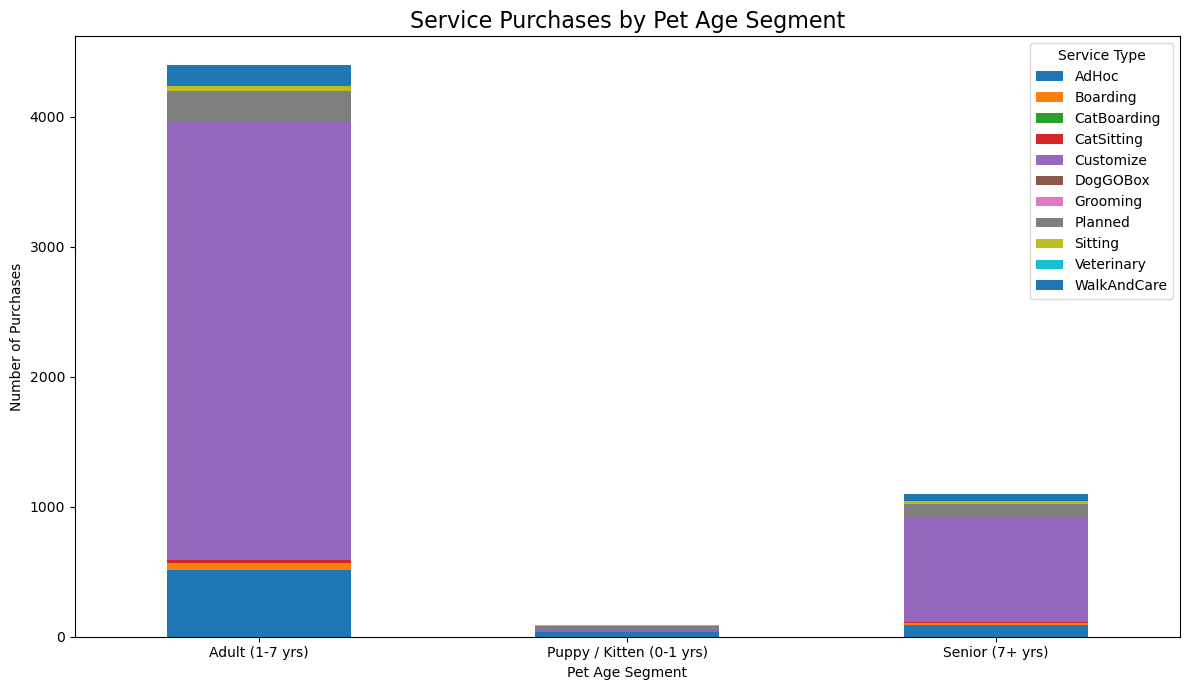

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Pet Age Segmentation ---

# Ensure the 'birthday' column is in datetime format, coercing errors
pets_df['birthday'] = pd.to_datetime(pets_df['birthday'], errors='coerce')

# Drop rows where birthday could not be parsed
pets_df.dropna(subset=['birthday'], inplace=True)

# Calculate pet age in years
current_date = pd.to_datetime('now')
pets_df['pet_age'] = (current_date - pets_df['birthday']).dt.days / 365.25

def get_age_segment(age):
    if age <= 1:
        return 'Puppy / Kitten (0-1 yrs)'
    elif 1 < age <= 7:
        return 'Adult (1-7 yrs)'
    elif age > 7:
        return 'Senior (7+ yrs)'
    else:
        return 'Unknown'

pets_df['age_segment'] = pets_df['pet_age'].apply(get_age_segment)

# Merge pet age data with purchase data
purchases_with_pet_details = pd.merge(purchase_df, pets_df[['ownerid', 'age_segment', 'pet_type', 'breed']], on='ownerid', how='inner')


# --- Analysis & Visualization ---

print("\n" + "="*80)
print("ANALYSIS: Service Preferences by Pet Age Segment")
print("="*80)
print("This analysis shows which services are most popular among different pet age groups.\n")


# Pivot table to see service preference by age
age_segment_preferences = purchases_with_pet_details.groupby(['age_segment', 'serviceType']).size().unstack(fill_value=0)
print(age_segment_preferences)


# --- INSIGHTS & ACTIONS ---
print("\n--- INSIGHTS & ACTIONS ---")
print("INSIGHT: Adult pets are the largest customer group. 'Customize' and 'AdHoc' services are popular across all age groups.")
print("ACTION: Create targeted marketing campaigns. For example:")
print("  - Offer a 'Puppy/Kitten Package' that bundles services like 'Planned' check-ins and basic training ('Customize').")
print("  - Promote specialized 'Customize' care options for 'Senior' pets, focusing on comfort and health monitoring.")


# Plotting the results for better visualization
age_segment_preferences.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Service Purchases by Pet Age Segment', fontsize=16)
plt.ylabel('Number of Purchases')
plt.xlabel('Pet Age Segment')
plt.xticks(rotation=0)
plt.legend(title='Service Type')
plt.tight_layout()
plt.show()

In [39]:
purchases_with_pet_details.head()
# top_dog_breeds is a list, not a DataFrame. If you want to sort the significant_dog_breeds DataFrame by total_owners:
# significant_dog_breeds.sort_values(by='total_owners', ascending=False).head(10)

,serviceid,ownerid,ordercreatedtime,serviceType,age_segment,pet_type,breed
0,04acd61d-a03a-4860-8d51-5d9be4ef28d4,01a7af8b-0dea-45df-8eea-6c35682c359d,2025-07-19 11:38:31.598000,Customize,Adult (1-7 yrs),dog,Labrador Retriever
1,04acd61d-a03a-4860-8d51-5d9be4ef28d4,01a7af8b-0dea-45df-8eea-6c35682c359d,2025-07-19 11:38:31.598000,Customize,Senior (7+ yrs),dog,Maltese
2,04acd61d-a03a-4860-8d51-5d9be4ef28d4,01a7af8b-0dea-45df-8eea-6c35682c359d,2025-07-19 11:38:31.598000,Customize,Senior (7+ yrs),dog,Poodle
3,13d2f7c1-58ce-4dcf-aea4-0e4c14a12818,01a7af8b-0dea-45df-8eea-6c35682c359d,2025-07-19 11:38:31.598000,Customize,Adult (1-7 yrs),dog,Labrador Retriever
4,13d2f7c1-58ce-4dcf-aea4-0e4c14a12818,01a7af8b-0dea-45df-8eea-6c35682c359d,2025-07-19 11:38:31.598000,Customize,Senior (7+ yrs),dog,Maltese


In [40]:
# --- Breed-Specific Propensity Analysis ---

print("\n" + "="*80)
print("ANALYSIS: Top 5 Dog Breeds and Their Service Preferences")
print("="*80)

# Get the list of top 5 converting dog breeds from your previous analysis
# For this example, I will use a sample list. Replace with your actual top breeds.
top_dog_breeds = ['Golden Retriever', 'Maltese', 'Maltipoo', 'Poodle', 'Mix Irk']
top_dog_purchases = purchases_with_pet_details[purchases_with_pet_details['breed'].isin(top_dog_breeds)]

dog_breed_preferences = top_dog_purchases.groupby(['breed', 'serviceType']).size().unstack(fill_value=0)
print(dog_breed_preferences)


print("\n" + "="*80)
print("ANALYSIS: Top 5 Cat Breeds and Their Service Preferences")
print("="*80)

# Replace with your actual top cat breeds
top_cat_breeds = ['Tekir', 'British Shorthair', 'Scottish Fold', 'Sarman', 'Üç Renkli Tekir (Calico)']
top_cat_purchases = purchases_with_pet_details[purchases_with_pet_details['breed'].isin(top_cat_breeds)]

cat_breed_preferences = top_cat_purchases.groupby(['breed', 'serviceType']).size().unstack(fill_value=0)
print(cat_breed_preferences)



ANALYSIS: Top 5 Dog Breeds and Their Service Preferences
serviceType       AdHoc  Boarding  Customize  DogGOBox  Grooming  Planned  \
breed                                                                       
Golden Retriever     54        14        420         1         1       53   
Maltese             133         4         50         0         1        2   
Maltipoo              6         5          0         0         0       10   
Mix Irk              22         6        250         0         1       20   
Poodle               34         6        539         0         0       19   

serviceType       Sitting  WalkAndCare  
breed                                   
Golden Retriever        7           26  
Maltese                 3            1  
Maltipoo                0            4  
Mix Irk                13           23  
Poodle                  4           16  

ANALYSIS: Top 5 Cat Breeds and Their Service Preferences
serviceType               AdHoc  CatBoarding  CatSitting 


ANALYSIS: RFM Behavioral Customer Segmentation
Customer distribution across different behavioral segments:

                Segment  Customer Count
0           Hibernating             363
1       Loyal Customers             280
2               At Risk             229
3             Champions             227
4   Potential Loyalists             213
5        About to Sleep             130
6        Need Attention              64
7      Cannot Lose Them              54
8             Promising              35
9                  nan1              24
10        New Customers              19
11                 nan2               7


C:\Users\caioa\AppData\Local\Temp\ipykernel_3520\3151630509.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='Customer Count', y='Segment', palette='viridis')


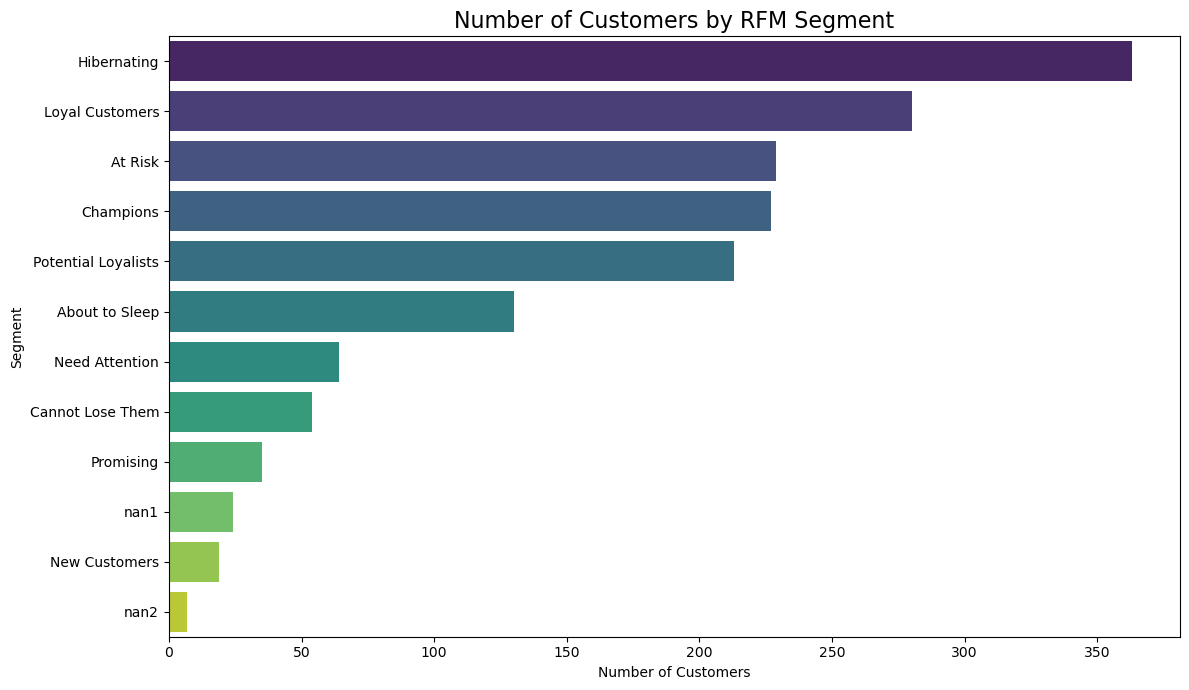

In [41]:
# --- RFM Segmentation ---

print("\n" + "="*80)
print("ANALYSIS: RFM Behavioral Customer Segmentation")
print("="*80)

# Ensure ordercreatedtime is datetime and timezone-naive
purchase_df['ordercreatedtime'] = pd.to_datetime(purchase_df['ordercreatedtime'], errors='coerce')
if pd.api.types.is_datetime64_any_dtype(purchase_df['ordercreatedtime']):
    # If column has timezone, remove it
    if purchase_df['ordercreatedtime'].dt.tz is not None:
        purchase_df['ordercreatedtime'] = purchase_df['ordercreatedtime'].dt.tz_localize(None)

# Set a snapshot date for calculations (e.g., the day after the last purchase)
snapshot_date = purchase_df['ordercreatedtime'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm_df = purchase_df.groupby('ownerid').agg({
    'ordercreatedtime': lambda date: (snapshot_date - date.max()).days,
    'serviceid': 'count'
}).rename(columns={'ordercreatedtime': 'Recency', 'serviceid': 'Frequency'})

# Monetary value is the same as Frequency in this case, so we'll just copy it.
rfm_df['Monetary'] = rfm_df['Frequency']

# Create RFM score quintiles (1 is worst, 5 is best)
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1]) # Lower recency is better
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combine scores
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Map scores to segment names
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Cannot Lose Them',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm_df['Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segment_map, regex=True)

# Display segment counts
segment_counts = rfm_df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer Count']
print("Customer distribution across different behavioral segments:\n")
print(segment_counts)


# Plotting the RFM segments
plt.figure(figsize=(12, 7))
sns.barplot(data=segment_counts, x='Customer Count', y='Segment', palette='viridis')
plt.title('Number of Customers by RFM Segment', fontsize=16)
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
# Defining the 'converted' variable
# A user is considered "converted" if their user ID appears in the purchase DataFrame.

# Merge for conversion analysis
conversion_df = pd.merge(checkout_agg, purchase_agg, on=['ownerid', 'serviceType'], how='left')
conversion_df['purchase_count'].fillna(0, inplace=True)
conversion_df['converted'] = conversion_df['purchase_count'] > 0


conversions = (conversion_df[conversion_df['converted']])

purchased_users = conversions['ownerid'].unique()

# Transformar purchased_users em um DataFrame
purchased_users_df = pd.DataFrame({'ownerid': purchased_users})

purchased_users_df['converted'] = True  # mark as converted
print(purchased_users_df['ownerid'].count())

sign_up_df_cleaned['converted'] = sign_up_df_cleaned['ownerid'].isin(purchased_users_df['ownerid']).astype(bool)
print(sign_up_df_cleaned.head())

1596
                                ownerid               signuptime  converted
0  4c73df87-0261-49b4-8093-ad005d847a73  2025-06-05 12:37:38.570      False
1  e3ad73cc-069e-40b8-88de-9e9b809f0f30  2025-06-10 11:28:09.529      False
2  57e12ad5-86f6-4dbe-aaaf-f0053ab0177c  2025-07-25 12:29:12.305      False
3  17c461c9-e459-44e2-a9cf-108ed7596d48  2025-05-23 14:46:42.714      False
4  3e0ea1ea-82f0-4a06-9505-6a0b8ba789ee  2025-07-01 01:01:24.759      False


C:\Users\caioa\AppData\Local\Temp\ipykernel_3520\2811686326.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  conversion_df['purchase_count'].fillna(0, inplace=True)


In [44]:
# Merge: full outer join
merged_df = pd.merge(
    sign_up_df_cleaned,
    purchased_users_df[['ownerid', 'converted']],
    on='ownerid',
    how='outer'
)
merged_df['converted_y'] = merged_df['converted_y'].fillna(False)

# Create a new column that is True if either is True
merged_df['converted'] = merged_df[['converted_x', 'converted_y']].any(axis=1)

# Drop the extra columns if you no longer need them
merged_df = merged_df.drop(columns=['converted_x', 'converted_y'])

print(merged_df['converted'].value_counts())
merged_df.head()


converted
False    10799
True      1596
Name: count, dtype: int64


C:\Users\caioa\AppData\Local\Temp\ipykernel_3520\3947454559.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['converted_y'] = merged_df['converted_y'].fillna(False)


,ownerid,signuptime,converted
0,00072d34-a056-461a-a26b-a7e2a19990ae,2025-06-20 21:40:01.284,False
1,000f420d-5e54-42a6-90a7-598e3784b70d,2025-06-26 23:23:24.661,False
2,0015b672-b7c1-4efc-bd4c-7fec06803e38,2025-06-21 22:38:52.416,False
3,0022c99c-41c2-4edf-a189-f2db73bc1da1,2025-06-07 00:21:02.566,False
4,002a92ab-e17b-4e50-bce1-ae05e87eaaba,2025-07-01 14:37:34.829,False


DataFrame for the first model (first 5 lines):

Target variable distribution:
converted
False    10799
True      1596
Name: count, dtype: int64

--- Training model: Random Forest ---

Random Forest accuracy: 0.9862866361925249

Random Forest Classification report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3240
        True       0.94      0.95      0.95       479

    accuracy                           0.99      3719
   macro avg       0.97      0.97      0.97      3719
weighted avg       0.99      0.99      0.99      3719


--- Trainding model: LightGBM ---
[LightGBM] [Info] Number of positive: 1117, number of negative: 7559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in th

[]

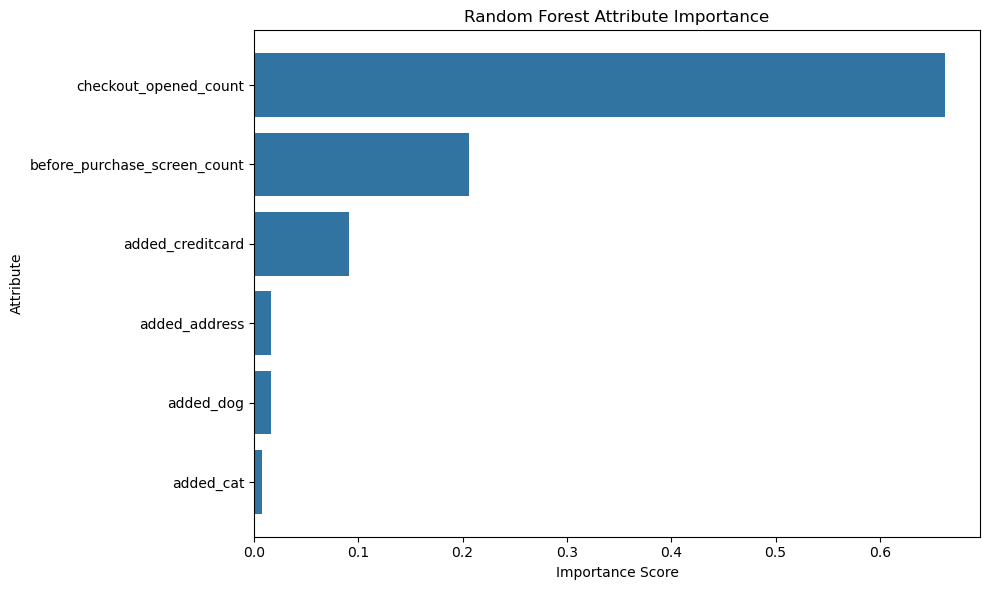

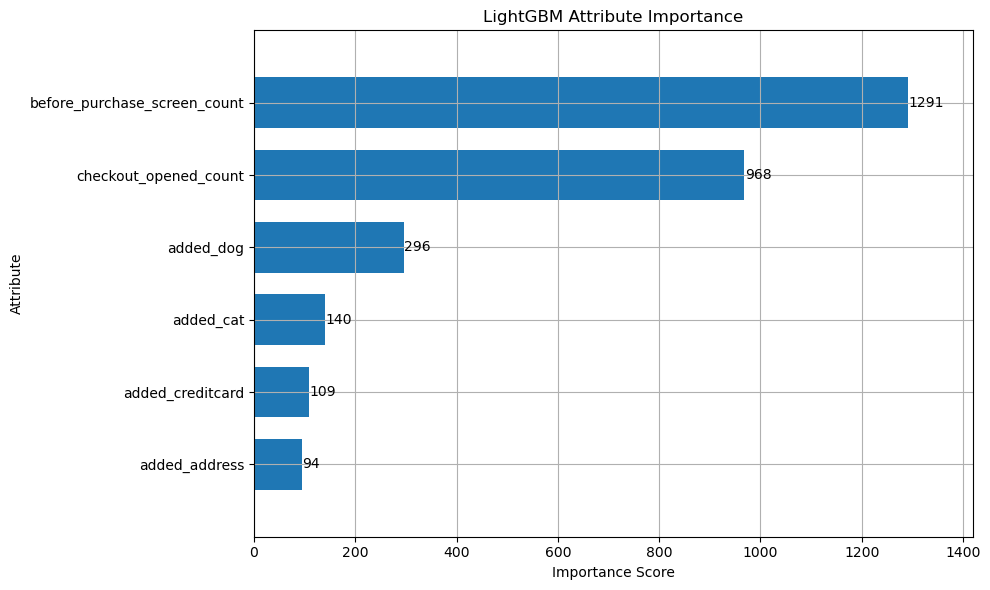

In [45]:
#Creating the main DataFrame for the model
model_df = merged_df[['ownerid', 'converted']].copy()
model_df['added_cat'] = model_df['ownerid'].isin(cat_added_df['ownerid']).astype(int)
model_df['added_dog'] = model_df['ownerid'].isin(dog_added_df['ownerid']).astype(int)
model_df['added_address'] = model_df['ownerid'].isin(address_added_df['ownerid']).astype(int)
model_df['added_creditcard'] = model_df['ownerid'].isin(creditcard_added_df['ownerid']).astype(int)
checkout_counts = checkout_opened_df.groupby('ownerid').size().reset_index(name='checkout_opened_count')
model_df = pd.merge(model_df, checkout_counts, on='ownerid', how='left').fillna(0)

before_purchase_counts = before_purchase_df_cleaned.groupby('ownerid').size().reset_index(name='before_purchase_screen_count')
model_df = pd.merge(model_df, before_purchase_counts, on='ownerid', how='left').fillna(0)

print("DataFrame for the first model (first 5 lines):")
model_df.head()
print("\nTarget variable distribution:")
print(model_df['converted'].value_counts())

X = model_df.drop(['ownerid', 'converted'], axis=1)
y = model_df['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n--- Training model: Random Forest ---")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("\nRandom Forest accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification report:")
print(classification_report(y_test, y_pred_rf))

feature_importances_rf = pd.DataFrame(rf_classifier.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_rf.importance, y=feature_importances_rf.index)
plt.title('Random Forest Attribute Importance')
plt.xlabel('Importance Score')
plt.ylabel('Attribute')
plt.tight_layout()
plt.plot()


print("\n--- Trainding model: LightGBM ---")
lgbm_classifier = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_classifier.fit(X_train, y_train)

y_pred_lgbm = lgbm_classifier.predict(X_test)

print("\nLightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

ax = lgb.plot_importance(lgbm_classifier, figsize=(10, 6), height=0.7)
plt.title('LightGBM Attribute Importance')
plt.xlabel('Importance Score')
plt.ylabel('Attribute')
plt.tight_layout()
plt.plot()

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# --- Step 1: Prepare the Data and Define the Treatment ---
model_df['added_pet'] = (model_df['added_cat'] | model_df['added_dog']).astype(int)

# For this analysis, our "treatment" is whether a user added a pet.
# The features for the propensity model should be things that happen *before* the treatment.
# For simplicity, we'll use other actions as proxies for pre-treatment behavior.
propensity_features = ['added_address', 'added_creditcard', 'before_purchase_screen_count']
X_propensity = model_df[propensity_features]
treatment = model_df['added_pet']


# --- Step 2: Calculate Propensity Scores ---

# We'll use a logistic regression model to predict the probability of a user adding a pet.
propensity_model = LogisticRegression(random_state=42)
propensity_model.fit(X_propensity, treatment)

# The propensity score is the probability of being in the treatment group
model_df['propensity_score'] = propensity_model.predict_proba(X_propensity)[:, 1]


# --- Step 3: Calculate Inverse Probability Weights ---

# Calculate weights to balance the two groups
# Weight for treated group = 1 / propensity
# Weight for control group = 1 / (1 - propensity)
model_df['iptw_weight'] = np.where(
    model_df['added_pet'] == 1,
    1 / model_df['propensity_score'],
    1 / (1 - model_df['propensity_score'])
)


# --- Step 4: Train Weighted Uplift Models (T-Learner with IPTW) ---

# Now, we'll train two models, one for each group, using these new weights.
features_for_uplift = ['added_address', 'added_creditcard', 'checkout_opened_count', 'before_purchase_screen_count']

# Data for the "treated" group (users who added a pet)
X_treatment = model_df[model_df['added_pet'] == 1][features_for_uplift]
y_treatment = model_df[model_df['added_pet'] == 1]['converted']
weights_treatment = model_df[model_df['added_pet'] == 1]['iptw_weight']

# Data for the "control" group (users who did not add a pet)
X_control = model_df[model_df['added_pet'] == 0][features_for_uplift]
y_control = model_df[model_df['added_pet'] == 0]['converted']
weights_control = model_df[model_df['added_pet'] == 0]['iptw_weight']

# Train the two models, passing the weights to the .fit() method
model_treatment_weighted = LGBMClassifier(random_state=42)
model_treatment_weighted.fit(X_treatment, y_treatment, sample_weight=weights_treatment)

model_control_weighted = LGBMClassifier(random_state=42)
model_control_weighted.fit(X_control, y_control, sample_weight=weights_control)


# --- Step 5: Estimate the Uplift (CATE) ---

# Now, predict the conversion probability for *all* users, as if they were in the treatment group
prob_conversion_if_treated = model_treatment_weighted.predict_proba(model_df[features_for_uplift])[:, 1]

# And predict the conversion probability for *all* users, as if they were in the control group
prob_conversion_if_control = model_control_weighted.predict_proba(model_df[features_for_uplift])[:, 1]

# The CATE is the difference
model_df['cate_added_pet'] = prob_conversion_if_treated - prob_conversion_if_control

print("\n--- Causal Uplift (CATE) for the 'added_pet' action ---")
print(model_df[['ownerid', 'cate_added_pet']].sort_values(by='cate_added_pet', ascending=False).head())

# Calculate the average causal effect
average_cate = model_df['cate_added_pet'].mean()
print(f"\nAverage Causal Effect of adding a pet on conversion: {average_cate:.2%}")

[LightGBM] [Info] Number of positive: 281, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 1577, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124369 -> initscore=-1.951691
[LightGBM] [Info] Start training from score -1.951691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf